#### Course: Data Visualization CIS 9655
#### Assignment # 1: MatPlotLib Dashboard
#### Name: Shuting Chen 
#### Date: 10/05/20

- Big Idea: NYC Restaurant Week is a twice-a-year event where thousands of locals and tourists can try out NYC’s top-notch restaurants at a low price,some of them having Michelin stars. Browsing the website to look through the list of participating restaurants and pick some to try can be stressful. The objective of the data visualizations is to help customers choose their top restaurants. 
- Data Source: https://www.kaggle.com/popoandrew/restaurant-week-2018/notebooks
- Data Description: The dataset describes different types of the review for the restaurants that are participating in the NYC Restaurant Week. The original dataset consists of 23 columns and 348 rows, including restaurant type, address, phone, food review, service review, price range and more.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
#to load the dataset 
data = pd.read_csv('restaurant_week_2018_final1.csv')

In [80]:
#delete the columns that will not be used in this analysis
del data['google_map']
del data['website']
del data['latitude']
del data['longitude']
del data['street_address']
del data['phone']
del data['description']
data.head(2)

,name,postal_code,review_count,restaurant_type,average_review,food_review,service_review,ambience_review,value_review,price_range,star_1,star_2,star_3,star_4,star_5,restaurant_main_type
0,Smoke Jazz and Supper Club,10025.0,2155,Contemporary American,4.42155,3.9,4.2,4.5,4.0,$31 to $50,2,7,5,24,62,Contemporary American
1,Tavern on the Green,10023.0,7029,American,4.67029,4.4,4.4,4.7,4.0,$31 to $50,1,2,6,19,72,American


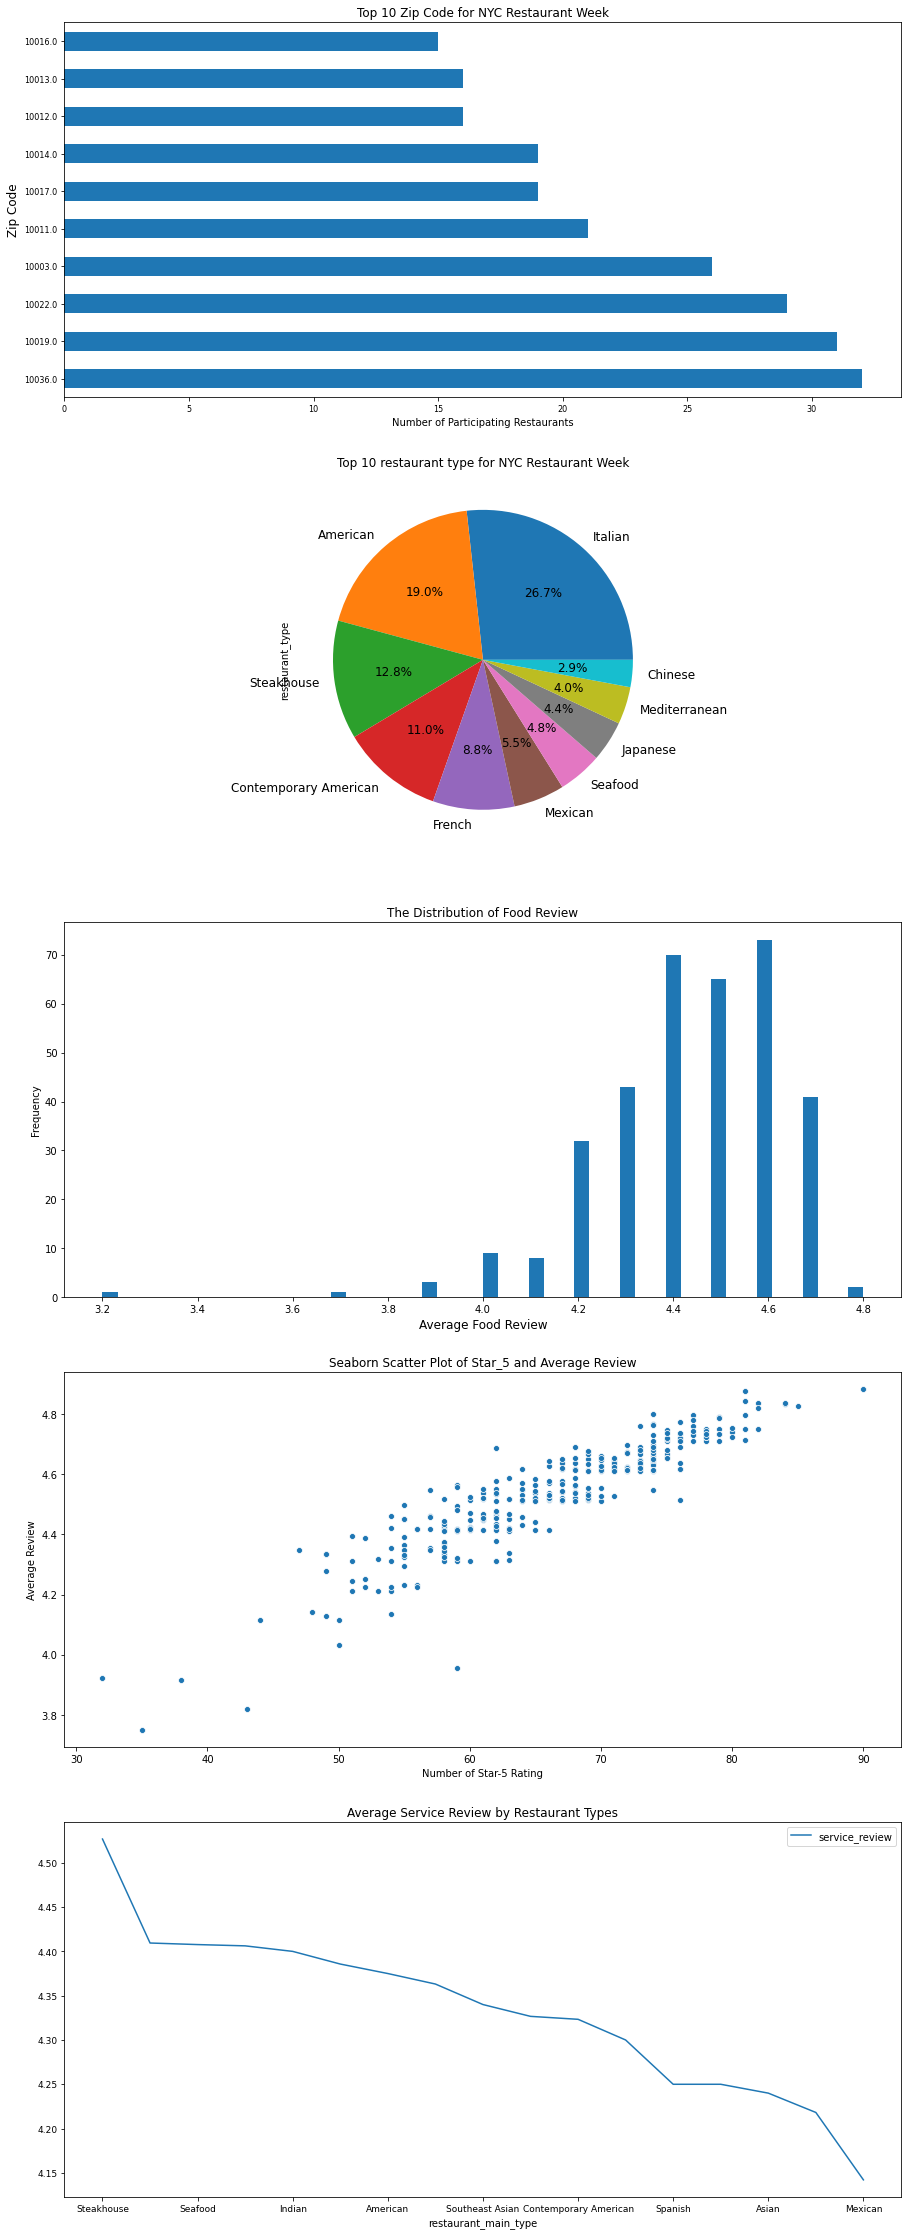

In [86]:
fig,axes = plt.subplots(5,1,figsize = (15,40))

# Bar Chart - Participating restaurants are spread throughout all five boroughs. Lets first look at the distribution of locations. Top 10 Zip Code for the NYC Restaurant Week

location = data.postal_code.value_counts().head(10)
location_graph = location.plot(kind = 'barh', title ='Top 10 Zip Code for NYC Restaurant Week', figsize =(15,40), ax = axes[0], fontsize = 8)
location_graph.set_xlabel("Number of Participating Restaurants",fontsize = 10)
location_graph.set_ylabel("Zip Code",fontsize = 12) #10036 - 32


# Pie Chart - To find out what are the top 10 restuarant types.

types = data.restaurant_type.value_counts().head(10)
types = types.plot(kind = 'pie', title ='Top 10 restaurant type for NYC Restaurant Week', autopct='%1.1f%%',
                   figsize =(15,40), ax = axes[1], fontsize = 12)

# Histogram - The graph below shows the distribution of the food review 

#plotData2 = data.groupby("restaurant_main_type").mean().sort_values('value_review', ascending = False).average_review
#plotData2 = plotData2.plot.hist(figsize =(15,40),ax = axes[2],title ='Numbers of the Review')

review_count = data['food_review'].plot.hist(bins=50, figsize =(15,40),ax = axes[2],title ='The Distribution of Food Review')
review_count.set_xlabel("Average Food Review",fontsize = 12)


# Scatter Plot - To find the relationship between Star_5 Rating and Average Review

review_star = sns.scatterplot(x=data['star_5'], y=data['average_review'],ax = axes[3])
review_star.set(xlabel = "Number of Star-5 Rating",
      ylabel = "Average Review",
      title = "Seaborn Scatter Plot of Star_5 and Average Review")

# Line Chart - To find out the top restuarant types that have good average service review.

graph = data.groupby('restaurant_main_type').mean().sort_values('service_review')
graph = graph.reset_index()
graph = graph.sort_values('service_review',ascending = False)
graph.plot.line(x = 'restaurant_main_type', y = 'service_review',figsize=(15,40),ax = axes[4],legend = True,fontsize=9,
                title ='Average Service Review by Restaurant Types')